In [12]:
### IMPORTAR LIBRERÍAS ###
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
### IMPORTAR LOS DATOS ###
data = pd.read_csv('Crash_Analysis_System_CAS_data.csv')
data.head()

,X,Y,OBJECTID_1,OBJECTID,crashYear,crashFinan,crashSever,fatalCount,seriousInj,minorInjur,...,moped,motorcycle,otherVehic,schoolBus,suv,taxi,truck,unknownVeh,vanOrUtili,Pedestrian
0,175.226860,-37.820620,667848,2001,2000,1999/2000,S,0,2,0,...,0,0,0,0,0,0,0,0,0,0
1,175.289010,-37.998924,667849,2002,2000,1999/2000,M,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,176.193733,-37.665581,667850,2003,2000,1999/2000,M,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,176.160955,-37.695747,667851,2004,2000,1999/2000,M,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,176.981378,-37.957300,667852,2005,2000,1999/2000,M,0,0,1,...,0,1,0,0,0,0,0,0,0,0


### ANALIZAR LOS DATOS 

In [14]:
#Conocer la forma de los datos
print("Tamaño original de la base de datos: ")
print(data.shape) 

Tamaño original de la base de datos: 
(674321, 90)


In [15]:
#Conocer el formato de los datos
datadt = data.dtypes
datadt

X             float64
Y             float64
OBJECTID_1      int64
OBJECTID        int64
crashYear       int64
               ...   
taxi            int64
truck           int64
unknownVeh      int64
vanOrUtili      int64
Pedestrian      int64
Length: 90, dtype: object

In [16]:
#Conocer los datos nulos
#print(data.isnull().sum())
datain = data.isnull().sum() 
datain

X             0
Y             0
OBJECTID_1    0
OBJECTID      0
crashYear     0
             ..
taxi          0
truck         0
unknownVeh    0
vanOrUtili    0
Pedestrian    0
Length: 90, dtype: int64

### PROCESAMIENTO DE LOS DATOS

In [17]:
#Eliminar las columnas que no son necesarias
data = data.drop(['X', 'Y', 'OBJECTID_1', 'OBJECTID'], axis=1)
data = data.drop(['crashDirec','crashRPDir','crashRPSH','crashRPNew',
                  'trafficCon','roadLane','cornerRoad'], axis=1)
data.head()

,crashYear,crashFinan,crashSever,fatalCount,seriousInj,minorInjur,multiVehic,holiday,regionDesc,tlaID,...,moped,motorcycle,otherVehic,schoolBus,suv,taxi,truck,unknownVeh,vanOrUtili,Pedestrian
0,2000,1999/2000,S,0,2,0,Single vehicle,None,Waikato,16,...,0,0,0,0,0,0,0,0,0,0
1,2000,1999/2000,M,0,0,1,Single vehicle,None,Waikato,17,...,0,0,0,0,0,0,0,0,0,0
2,2000,1999/2000,M,0,0,1,Multi vehicle,None,Bay of Plenty,23,...,0,0,0,0,0,0,0,0,0,0
3,2000,1999/2000,M,0,0,1,Multi vehicle,None,Bay of Plenty,23,...,0,0,0,0,0,0,0,0,0,0
4,2000,1999/2000,M,0,0,1,Multi vehicle,None,Bay of Plenty,25,...,0,1,0,0,0,0,0,0,0,0


In [18]:
#Reducir el conjunto de datos y trabajar con los accidentes desde 2011
data = data.loc[(data['crashYear'] > 2010), :]
data.head()

,crashYear,crashFinan,crashSever,fatalCount,seriousInj,minorInjur,multiVehic,holiday,regionDesc,tlaID,...,moped,motorcycle,otherVehic,schoolBus,suv,taxi,truck,unknownVeh,vanOrUtili,Pedestrian
404513,2011,2010/2011,F,1,1,4,Multi vehicle,Christmas/New Year,Bay of Plenty,27,...,0,0,0,0,0,0,0,0,0,0
404514,2011,2010/2011,F,1,1,4,Multi vehicle,Christmas/New Year,Waikato,13,...,0,0,0,0,0,0,0,0,0,0
404515,2011,2010/2011,F,1,1,0,Multi vehicle,Christmas/New Year,Waikato,11,...,0,2,0,0,0,0,0,0,0,0
404516,2011,2010/2011,F,1,1,0,Single vehicle,Christmas/New Year,Auckland,7,...,0,0,0,0,0,0,0,0,0,0
404517,2011,2010/2011,F,2,0,0,Multi vehicle,None,Bay of Plenty,23,...,0,1,0,0,0,0,0,0,0,0


### VISUALIZACIÓN DE LOS DATOS

In [19]:
# Visualizar de manera de texto el número de muertos y heridos
ano_inicio = data.crashYear.min()
ano_final = data.crashYear.max()

fatal = data['fatalCount'].sum()
mayor = data['seriousInj'].sum()
menor = data['minorInjur'].sum()

print("El total de muertes en accidentes de tránsito desde el {}".format(ano_inicio))
print("hasta el {} es de {}".format(ano_final,fatal))
print("Mientras el número total de heridos graves es de {}".format(mayor))
print("y el de heridos menores es de {}".format(menor))

El total de muertes en accidentes de tránsito desde el 2011
hasta el 2018 es de 2430
Mientras el número total de heridos graves es de 17693
y el de heridos menores es de 79943


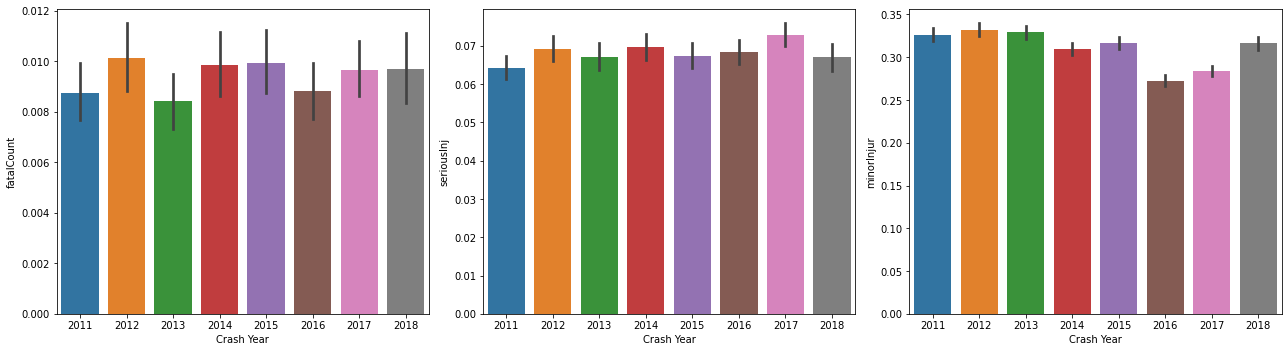

In [20]:
#Visualizar los muertos, heridos graves y heridos menores por año
fig, ax = plt.subplots(1, 3, figsize = (18, 5));
sns.barplot(x="crashYear", y="fatalCount", data=data, ax=ax[0]);
sns.barplot(x="crashYear", y="seriousInj", data=data, ax=ax[1]);
sns.barplot(x="crashYear", y="minorInjur", data=data, ax=ax[2]);
[ax[i].set_xlabel('Crash Year') for i in range(3)]
plt.tight_layout()

<AxesSubplot:xlabel='count', ylabel='crashSever'>

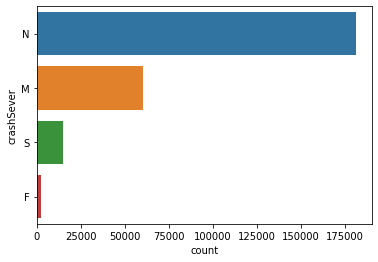

In [21]:
#Visualizar la severidad de los accidentes ocurridos
sns.countplot(y="crashSever",data=data,order='NMSF')

In [22]:
#Convertimos los datos tipos objetos en numéricos
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

for i in data:
    if data[i].dtype == 'object':
        encoder.fit(data[i].astype(str))
        data[i] = encoder.transform(data[i])
data = pd.get_dummies(data)

### ANÁLISIS DE MACHINE LEARNING

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [24]:
#Definir las variables dependientes e independientes
y = data['fatalCount']
X = data.drop('fatalCount', axis=1)

In [25]:
#Separar los datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20,
                                                    random_state=1)

In [26]:
#Definir el algoritmo 
algoritmo = RandomForestRegressor(n_estimators=50)

#Entrenar el algoritmo
algoritmo.fit(X_train, y_train)

#Realizar una predicción
y_test_pred = algoritmo.predict(X_test)

In [27]:
#Cálculo de la precisión del modelo
#Calculo R2
print("La precisión del modelo analizando el valor de R2_Score es: ")
print(r2_score(y_test,y_test_pred))

La precisión del modelo analizando el valor de R2_Score es: 
0.8888376275377861
